# Lets try to see if we really add 0dB Noise

In [16]:
# imports
from sample import calculation,helpers,loadData
import librosa as lr
import numpy as np
import soundfile as sf
import math
import matplotlib.pyplot as plt
import librosa.display

In [2]:
# load Data
noise_path = helpers.NOISE_PROCESSED+"aircon_2_0.wav"
audio_path = helpers.DATA_PROCESSED+"usage_0_5.wav"
sr = helpers.SAMPLE_RATE
noise,_ = lr.load(noise_path,sr=sr)
audio,_ = lr.load(audio_path,sr=sr)

In [3]:
# check for 0db SNR
constant = calculation.get_constant(audio,noise)
power_signal = calculation.meanPower(audio)
power_noise = calculation.meanPower(constant*noise)

print(constant)

print("SNR: %s dB" %calculation.snr(power_signal,power_noise))
noisy_audio = calculation.add_noise_zero_db(audio,noise)

0.31135818
SNR: 0.0 dB


In [4]:
# try to load noise as numerical data
noise_all = helpers.NOISE_PROCESSED
audio_all = helpers.DATA_PROCESSED
noise_array = helpers.getNumpyData(noise_all)
audio_array = helpers.getNumpyData(audio_all)

In [5]:
print(noise_array.shape)
print(audio_array.shape)

(100, 80000)
(72, 80000)


In [10]:
noisy_array = loadData.numericalData(audio_array,noise_array)
print(noisy_array.shape)

(72, 100, 80000)


In [7]:
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))

    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    return noise

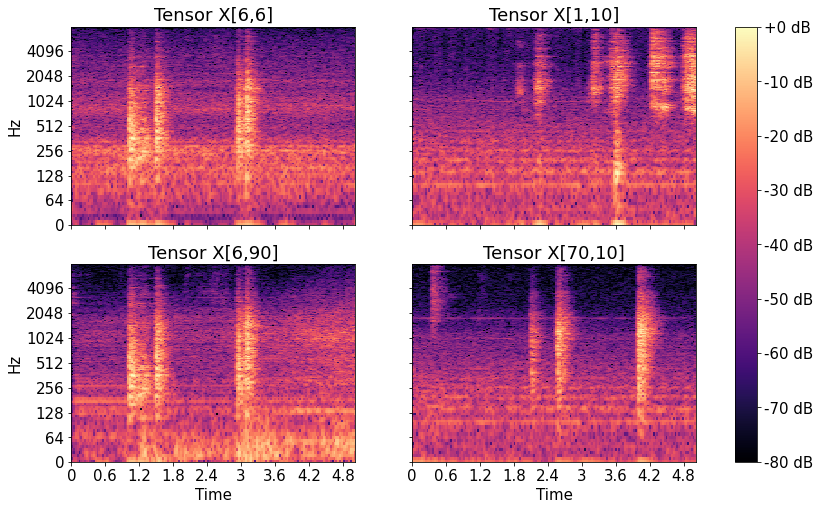

In [32]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,8))

D_w = lr.amplitude_to_db(np.abs(lr.stft(noisy_array[6,6])), ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[0,0])
plt.sca(ax[0,0])
plt.yticks(size=15)
plt.xticks(size=15)
ax[0,0].set_xlabel(None)
ax[0,0].set_xticklabels([])
plt.ylabel("Hz",size=15)
plt.title("Tensor X[6,6]",size=18)

D_a = lr.amplitude_to_db(np.abs(lr.stft(noisy_array[1,10])), ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[0,1])
plt.sca(ax[0,1])
plt.xticks(size=15)
ax[0,1].set_xticklabels([])
ax[0,1].set_xlabel(None)
ax[0,1].set_yticklabels([])
ax[0,1].set_ylabel(None)
plt.title("Tensor X[1,10]",size=18)

D_a = lr.amplitude_to_db(np.abs(lr.stft(noisy_array[6,90])), ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[1,0])
plt.sca(ax[1,0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
plt.title("Tensor X[6,90]",size=18)

D_w = lr.amplitude_to_db(np.abs(lr.stft(noisy_array[70,10])), ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[1,1])
plt.sca(ax[1,1])
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
ax[1,1].set_ylabel(None)
ax[1,1].set_yticklabels([])
plt.title("Tensor X[70,10]",size=18)

# fancy colorbar
cb = fig.colorbar(img,ax=ax,format="%+2.f dB")
for t in cb.ax.get_yticklabels():
    t.set_fontsize(15)
plt.savefig("tensor.pdf",dpi=300,bbox_inches="tight",transparent=True)